In [1]:
import pandas as pd
import math
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx import tree_data, dfs_tree, bfs_tree



In [2]:
def load_data(filename='Ancestors2019-processed.csv'):

    df = pd.read_csv(filename, header=None, sep=';', index_col=0)

    return df


def update_header(dataframe, header_string=None):
    if (header_string == None):
        header_string = "\tFirst name	Surname	Date birth	Place birth	Date death	Place death	Father first name	Father surname	Mother first name	Mother surname	Marry date	Marry place	married to	surname"
        header_string = header_string.split("\t")

    rename_dict = dict()
    child_counter = 1
    new_child = True

    for i in df.columns:
        try:
            rename_dict[i] = header_string[i]
        except:
            if new_child:
                rename_dict[i] = f"child_{child_counter}"
                new_child = False
            else:
                rename_dict[i] = f"birth_date_child_{child_counter}"
                new_child = True
                child_counter += 1

    dataframe.rename(rename_dict, axis='columns', inplace=True)
    return dataframe, child_counter

def create_node_links(df, child_counter):

    nodes = []
    links = []

    G = nx.DiGraph()

    print("hello")
    print(G)

    for row in df.iterrows():

        if isinstance(row[1]["Surname"], float):
            birth = str(row[1]["Date birth"])[-4:]
            name = str(row[1]["First name"]) + " " + "UNKNOWN"

            G.add_node(int(row[0]), birthyear=birth, name=name)

            nodes.append({"id": row[0],
                          "name": name,
                          "birthyear": birth})
        else:
            birth = str(row[1]["Date birth"])[-4:]
            name = str(row[1]["First name"]) + " " + str(row[1]["Surname"])

            G.add_node(int(row[0]), birthyear=birth, name=name)

            nodes.append({"id": row[0],
                          "name": name,
                          "birthyear": birth})

    for node in nodes:
        for child_number in range(1, child_counter):
            checker = df.loc[node["id"]][f"child_{child_number}"]
            if isinstance(checker, float):
                continue
            if checker.isdigit():
                # print(node["id"], checker)
                G.add_edge(int(node["id"]), int(checker), type="child")
                # print(node["id"], checker)
                links.append({  "source": node["id"],
                                "target": checker,
                                "type": "child"})
            else:
                # G.add_edge(node["id"], checker, type="child")
                pass
                # print("not appending")
                # create leaf nodes and links here

        for person in ['married to', 'Father first name', 'Mother first name']:
            spouse = df.iloc[node["id"]-1][person]
            # print(spouse)
            if isinstance(spouse, float):
                continue
            if spouse.isdigit():
                # print(spouse)
                G.add_edge(int(node["id"]), int(spouse), type=person)
                links.append({  "source": node["id"],
                                "target": spouse,
                                "type": "spouse"})
            else:
                # G.add_edge(node["id"], spouse, type="spouse")
                pass


    # print(G.edges)
    # nx.draw(G, with_labels=True, font_weight='bold')
    # plt.show()
    nx.draw_networkx(G, with_labels = True, node_size = 30)
    plt.show()
    # print(asdasd)
    graph = {"nodes": nodes, "links": links}
    return graph, G



hello



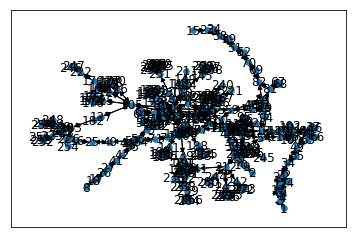

[(1, {}), (3, {}), (11, {}), (4, {}), (21, {}), (12, {}), (34, {}), (22, {}), (49, {}), (35, {}), (13, {}), (14, {}), (65, {}), (50, {}), (5, {}), (6, {}), (79, {}), (66, {}), (36, {}), (37, {}), (92, {}), (80, {}), (112, {}), (91, {}), (121, {}), (113, {}), (156, {}), (157, {}), (158, {}), (160, {}), (161, {}), (162, {}), (163, {}), (164, {}), (165, {}), (120, {}), (212, {}), (213, {}), (214, {}), (215, {}), (216, {}), (217, {}), (218, {}), (219, {}), (159, {}), (220, {}), (103, {}), (104, {}), (241, {}), (242, {}), (243, {}), (244, {}), (245, {}), (153, {}), (154, {}), (118, {}), (119, {}), (122, {}), (123, {}), (87, {}), (88, {}), (89, {}), (90, {}), (267, {}), (268, {}), (269, {}), (270, {}), (271, {}), (272, {}), (273, {}), (274, {}), (275, {}), (276, {}), (277, {}), (278, {}), (279, {}), (280, {}), (281, {}), (114, {}), (115, {}), (116, {}), (117, {}), (155, {}), (166, {}), (167, {}), (105, {}), (106, {}), (107, {}), (108, {}), (109, {}), (110, {}), (73, {}), (74, {}), (75, {}), 

In [35]:
if __name__ == "__main__":
    df = load_data()
    df, child_counter = update_header(df)
    graph, G = create_node_links(df, child_counter)

    # print(graph)
    file_object = open("graph.json", 'w')
    json.dump(graph, file_object)

    # print(G.nodes.data())
    T = dfs_tree(G, 1)
    T = bfs_tree(G, 1)
    print(T.nodes.data())

    treeJSON = tree_data(T, 1)
#     print(treeJSON)

    file_object = open("tree.json", 'w')
    json.dump(treeJSON, file_object)
    # f = open("graph.json", "r")
    # print(f.read())
    # G = nx.readwrite.json_graph.node_link_graph(graph)


In [52]:
for node in T.nodes.data():
#     print(node[0])
#     print(G[node[0]])
    print(node[0])
    nodule = G.nodes[node[0]]
    index = int(node[0])
    
    for attribute in nodule.keys():
#         print(attribute)
        T.nodes[node[0]][attribute] = nodule[attribute]
#     print(T.nodes[node[0]])

    
# print(T.nodes.data())

1
{'birthyear': '1525', 'name': 'Willem UNKNOWN'}
3
{'birthyear': '1550', 'name': 'Reynger Creuck'}
11
{'birthyear': '1575', 'name': 'Willem de Oude'}
4
{'birthyear': 'nan', 'name': 'Machtelt UNKNOWN'}
21
{'birthyear': '1609', 'name': 'Pieter Creuck'}
12
{'birthyear': '1580', 'name': 'Aefge UNKNOWN'}
34
{'birthyear': '1640', 'name': 'Willem Kreuk'}
22
{'birthyear': '1611', 'name': 'Neeltje Stolck'}
49
{'birthyear': '1674', 'name': 'Pieter Kreuck(niet)'}
35
{'birthyear': '1642', 'name': 'Geertje Beyer'}
13
{'birthyear': '1580', 'name': 'Jan Stolck'}
14
{'birthyear': '1587', 'name': 'Aaltje UNKNOWN'}
65
{'birthyear': '1707', 'name': 'Jan Kreuk'}
50
{'birthyear': '1676', 'name': 'Trijntje Snoey'}
5
{'birthyear': '1550', 'name': 'Cornelis Stolck'}
6
{'birthyear': '1561', 'name': 'Adriaantje UNKNOWN'}
79
{'birthyear': '1736', 'name': 'Jan Kreuk'}
66
{'birthyear': '1708', 'name': 'Magteltje Brouwer'}
36
{'birthyear': '1651', 'name': 'Jan Snoeij'}
37
{'birthyear': 'nan', 'name': 'Neeltje Geer